In [1]:
import os
import json
import numpy as np
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets.cifar10 import load_data

import matplotlib.pyplot as plt

In [2]:
(_, _), (x_test, _) = load_data()

In [3]:
x_test = x_test.astype('float32') / 255.

In [14]:
autoencoder = load_model('./results/model_05/autoencoder.h5')

In [15]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464 

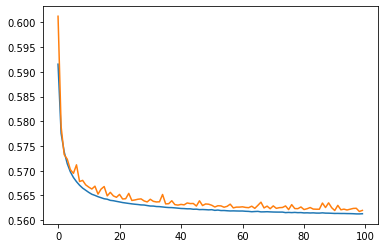

In [16]:
with open('./results/model_05/training_history.json', 'r') as f:
    history = json.load(f)
    
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.show()

In [7]:
decoded_imgs = autoencoder.predict(x_test)
reconstruction_errors = np.mean(np.square(x_test - decoded_imgs), axis=(3,1,2))

In [10]:
prioritization = np.argsort(reconstruction_errors)[::-1]

np.save('./tmp/ae.npy', prioritization)

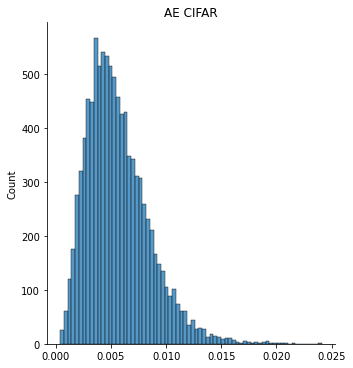

In [9]:
# plot the distribution of reconstruction errors

sns.displot(reconstruction_errors)
plt.title('AE CIFAR')
# plt.savefig('./tmp/ae_cifar', bbox_inches='tight')
plt.show()